# Lab 8.1: Нейронні мережі в розпізнаванні образів. Частина 2
### Шевченко Юлія, ФІ-31мн

In this homework, we are going to build your first classifier for the CIFAR-10 dataset. This dataset contains 10 different classes, and we can learn more about it [here](https://www.cs.toronto.edu/~kriz/cifar.html). This homework consists of the following tasks:

* Dataset inspection
* Building the network
* Training
* Evaluation

In the end, as usual, there will be a couple of questions for you to answer :-)

In [1]:
# All the imports for the task
from collections import Counter

import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from numpy.random import seed
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout
from tensorflow.random import set_seed

In [2]:
# Set the seeds for reproducibility
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

## Step 0: Dataset Inspection

Load the dataset and make a quick inspection.

In [3]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Mapping from class ID to class name
classes = {0: 'plane', 1: 'car', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

In [4]:
# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

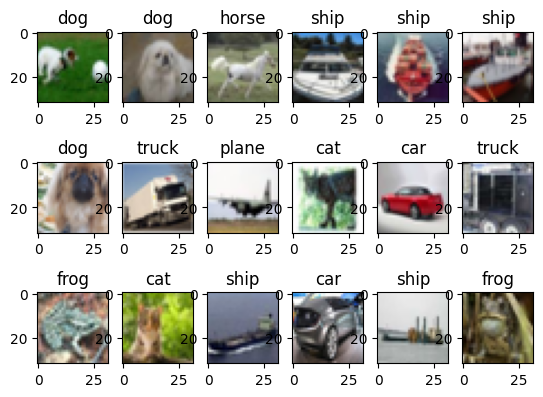

In [5]:
# Visualize random samples (as a plot with 3x6 samples)
for image_index in range(18):    
    plt.subplot(3, 6, image_index + 1)
    
    # Pick a random sample
    idx = np.random.randint(0, len(x_train))
    
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx][0])])

In [6]:
# Compute the class histogram
class_counts = Counter(y_train.flatten())
print('Class Histogram: ')

for class_id, count in class_counts.items():
    print('Class {}: {} samples'.format(class_id, count))

Class Histogram: 
Class 6: 5000 samples
Class 9: 5000 samples
Class 4: 5000 samples
Class 1: 5000 samples
Class 2: 5000 samples
Class 7: 5000 samples
Class 8: 5000 samples
Class 3: 5000 samples
Class 5: 5000 samples
Class 0: 5000 samples


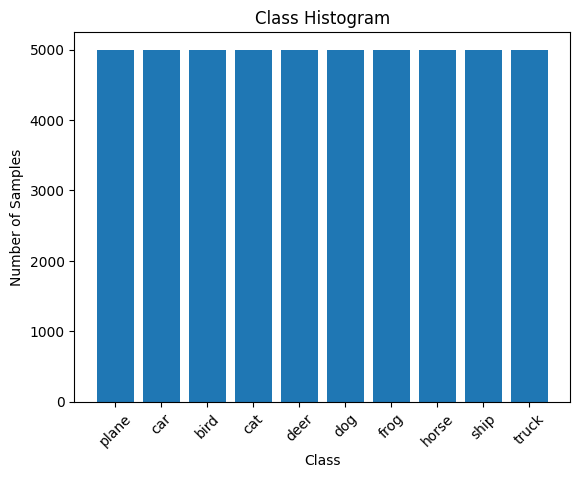

In [7]:
# Plot the class histogram
plt.figure()
plt.bar(class_counts.keys(), class_counts.values())
plt.title('Class Histogram')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(list(classes.keys()), [classes[i] for i in range(num_classes)], rotation=45)
plt.show()

## Step 1: Data Preparation

In this step, you'll need to prepare the data for training, i.e., you will have to normalize it and encode the labels as one-hot vector.

In [8]:
# Normalization
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set: {} samples'.format(len(y_train)))
print('Test set: {} samples'.format(len(y_test)))
print('Sample dims: {}'.format(x_train.shape))

Train set: 50000 samples
Test set: 10000 samples
Sample dims: (50000, 32, 32, 3)


## Step 2: Building the Classifier

Build the CNN for CIFAR-10 classification. For starters, you can use the same network we used in the lesson for the MNIST problem.

In [9]:
# Define the input shape
input_shape = (size, size, 3)

# Build the classifier
model = tf.keras.Sequential([
    Input(shape=input_shape),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Show the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

## Step 3: Training

Compile the model and train it.

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
epochs = 25
batch_size = 128

# Train the model
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

Epoch 1/25
391/391 [==============================] - 9s 21ms/step - loss: 1.5397 - accuracy: 0.4468 - val_loss: 1.2984 - val_accuracy: 0.5407
Epoch 2/25
391/391 [==============================] - 8s 20ms/step - loss: 1.2031 - accuracy: 0.5789 - val_loss: 1.1825 - val_accuracy: 0.5835
Epoch 3/25
391/391 [==============================] - 8s 20ms/step - loss: 1.0754 - accuracy: 0.6258 - val_loss: 1.0734 - val_accuracy: 0.6315
Epoch 4/25
391/391 [==============================] - 8s 20ms/step - loss: 0.9724 - accuracy: 0.6630 - val_loss: 1.0215 - val_accuracy: 0.6479
Epoch 5/25
391/391 [==============================] - 8s 20ms/step - loss: 0.9059 - accuracy: 0.6863 - val_loss: 0.9731 - val_accuracy: 0.6673
Epoch 6/25
391/391 [==============================] - 8s 20ms/step - loss: 0.8530 - accuracy: 0.7043 - val_loss: 0.9261 - val_accuracy: 0.6800
Epoch 7/25
391/391 [==============================] - 8s 20ms/step - loss: 0.7966 - accuracy: 0.7229 - val_loss: 0.9204 - val_accuracy: 0.6842

Train Accuracy: 0.9491599798202515
Validation Accuracy: 0.6901999711990356


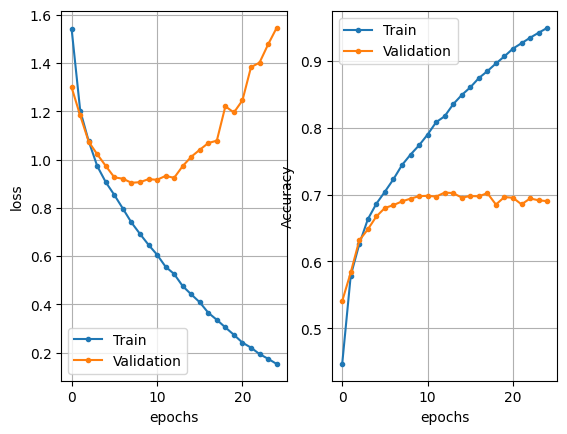

In [12]:
# Show training history
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-', epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Accuracy: {}'.format(h['accuracy'][-1]))
print('Validation Accuracy: {}'.format(h['val_accuracy'][-1]))

## Step 4: Evaluation

In this step, you have to calculate the accuracies and visualize some random samples. For the evaluation, you are going to use the test split from the dataset.

In [13]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 1s 2ms/step


In [14]:
# Compute and print the accuracy for each class
class_accuracies = {}
for class_id, class_name in classes.items():
    class_indices = np.where(y_true == class_id)[0]
    class_correct = np.sum(y_true[class_indices] == y_pred[class_indices])
    class_accuracy = class_correct / len(class_indices)
    class_accuracies[class_name] = class_accuracy
    print('Class {}: {:.2%}'.format(class_id, class_accuracy))

Class 0: 73.80%
Class 1: 82.90%
Class 2: 57.40%
Class 3: 40.60%
Class 4: 66.70%
Class 5: 65.00%
Class 6: 71.80%
Class 7: 73.20%
Class 8: 80.30%
Class 9: 78.50%


In [15]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss: {}'.format(ev[0]))
print('Test metric: {}'.format(ev[1]))

313/313 [==============================] - 1s 2ms/step - loss: 1.5452 - accuracy: 0.6902
Test loss: 1.545243740081787
Test metric: 0.6901999711990356


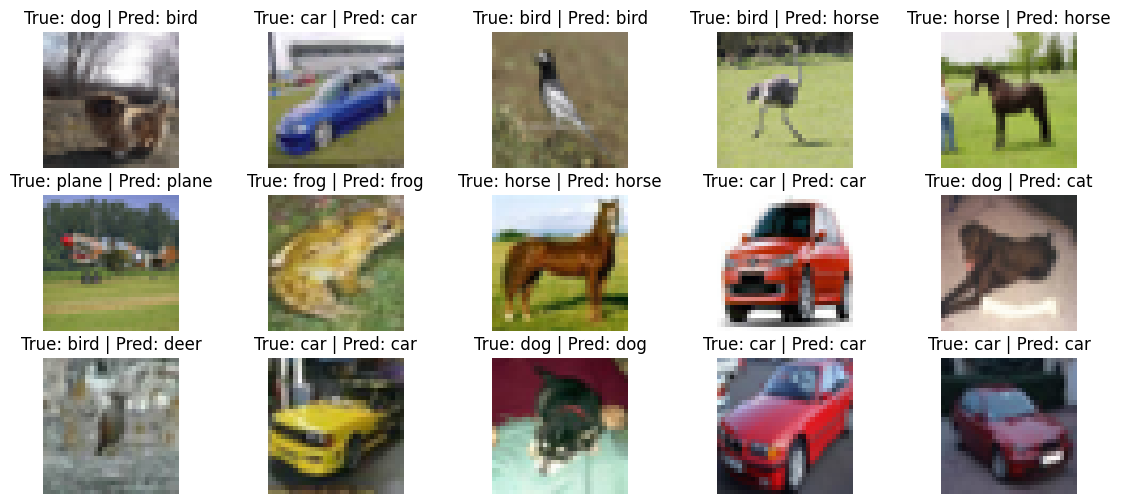

In [16]:
# Show random samples
plt.figure(figsize=(14, 6))

for image_index in range(15):
    # Pick a random sample
    idx = np.random.randint(0, len(x_test))
    
    # Show the results
    plt.subplot(3, 5, image_index + 1)
    plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))
    plt.axis('off')
    
plt.show()

## Questions

#### What is the overall accuracy of the classifier?

To determine the overall accuracy of the classifier, we can use the accuracy metric obtained during the evaluation of the model on the test set. This metric is calculated as the proportion of correctly classified samples out of all samples in the test set.

In [17]:
print('Test metric: {}'.format(ev[1]))

Test metric: 0.6901999711990356


#### What modifications would you do to improve the classification accuracy?

Improving the classification accuracy can involve various strategies, including but not limited to:
   -   Increasing model complexity by adding more layers or neurons.
   -   Using a different network architecture, such as a deeper CNN or a different type of neural network (e.g., ResNet, DenseNet).
   -   Regularization techniques, such as dropout or L2 regularization, to prevent overfitting.
   -   Data augmentation to increase the diversity of training data.
   -   Hyperparameter tuning, including learning rate adjustment, batch size optimization, etc.
   -   Transfer learning by using pre-trained models or fine-tuning existing models.

#### Make one modification (that you think can help) and train the classifier again. Does the accuracy improve?

As an example modification, let's add dropout regularization after the first dense layer to prevent overfitting. Dropout randomly sets a fraction of input units to zero during training, which helps to prevent the model from relying too much on specific features. We'll add a dropout layer with a dropout rate of 0.5 after the first dense layer. After making this modification, we'll train the classifier again and observe if the accuracy improves.

In [18]:
# Build the classifier with dropout regularization
model_with_dropout = tf.keras.Sequential([
    Input(shape=input_shape),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Add dropout regularization
    Dense(num_classes, activation='softmax')
])

In [19]:
# Compile the model
model_with_dropout.compile(optimizer='adam',
                            loss='categorical_crossentropy',
                            metrics=['accuracy'])

In [20]:
epochs = 25

# Train the model with dropout regularization
history_with_dropout = model_with_dropout.fit(x_train, y_train,
                                              epochs=epochs,
                                              batch_size=batch_size,
                                              validation_data=(x_test, y_test))

Epoch 1/25
391/391 [==============================] - 9s 20ms/step - loss: 1.7362 - accuracy: 0.3627 - val_loss: 1.4277 - val_accuracy: 0.4989
Epoch 2/25
391/391 [==============================] - 8s 20ms/step - loss: 1.4180 - accuracy: 0.4870 - val_loss: 1.2532 - val_accuracy: 0.5605
Epoch 3/25
391/391 [==============================] - 8s 20ms/step - loss: 1.2955 - accuracy: 0.5396 - val_loss: 1.1445 - val_accuracy: 0.5976
Epoch 4/25
391/391 [==============================] - 8s 20ms/step - loss: 1.1932 - accuracy: 0.5779 - val_loss: 1.0826 - val_accuracy: 0.6190
Epoch 5/25
391/391 [==============================] - 8s 20ms/step - loss: 1.1270 - accuracy: 0.6027 - val_loss: 1.0417 - val_accuracy: 0.6296
Epoch 6/25
391/391 [==============================] - 8s 20ms/step - loss: 1.0793 - accuracy: 0.6203 - val_loss: 0.9629 - val_accuracy: 0.6648
Epoch 7/25
391/391 [==============================] - 8s 20ms/step - loss: 1.0419 - accuracy: 0.6335 - val_loss: 0.9629 - val_accuracy: 0.6646

In [21]:
# Evaluate the model with dropout regularization
ev_with_dropout = model_with_dropout.evaluate(x_test, y_test)
print('Test loss with dropout  ', ev_with_dropout[0])
print('Test metric with dropout', ev_with_dropout[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.8930 - accuracy: 0.7096
Test loss with dropout   0.8930360078811646
Test metric with dropout 0.7095999717712402
